In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(predictions=None):
    """
    Plot training data, test data, and model predictions
    Args:
        predictions: Model predictions (tensor)
    """
    plt.figure(figsize=(10, 6))
    
    # Convert tensors to numpy arrays and detach gradients
    test_data = X_test.detach().numpy()
    test_labels = y_test.detach().numpy()
    
    # Plot training data
    plt.scatter(X_train.detach().numpy(), 
                y_train.detach().numpy(), 
                c="b", 
                s=4, 
                label="Training data")
    
    # Plot test data
    plt.scatter(test_data, 
                test_labels, 
                c="g", 
                s=4, 
                label="Testing data")
    
    # Plot predictions if available
    if predictions is not None:
        plt.scatter(test_data, 
                    predictions.detach().numpy(), 
                    c="r", 
                    s=4, 
                    label="Predictions")
    
    plt.legend(prop={"size": 14})
    plt.show()

In [5]:
# linear regression model 
class linearregression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float32))
        
    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias

In [6]:
torch.manual_seed(64)
m1= linearregression()
list(m1.parameters())

[Parameter containing:
 tensor([-0.8159], requires_grad=True),
 Parameter containing:
 tensor([0.6431], requires_grad=True)]

In [7]:
with torch.inference_mode():
    y_preds = m1(X_test)
    
y_preds

tensor([[-0.0097],
        [-0.0260],
        [-0.0423],
        [-0.0586],
        [-0.0750],
        [-0.0913],
        [-0.1076],
        [-0.1239],
        [-0.1402],
        [-0.1566]])

In [8]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.0097],
        [-0.0260],
        [-0.0423],
        [-0.0586],
        [-0.0750],
        [-0.0913],
        [-0.1076],
        [-0.1239],
        [-0.1402],
        [-0.1566]])


In [9]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=m1.parameters(),lr=0.1)

In [10]:
torch.manual_seed(86)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    
    m1.train()
    
    y_pred = m1(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optim.zero_grad()
    
    loss.backward()
    
    optim.step()
    
    m1.eval()
    with torch.inference_mode():
        test_pred = m1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(m1.state_dict())

Epoch: 0 | Loss: 0.35393890738487244 | Test loss: 0.9372870326042175
OrderedDict({'weights': tensor([-0.7835]), 'bias': tensor([0.6831])})
Epoch: 10 | Loss: 0.252789169549942 | Test loss: 0.6090431809425354
OrderedDict({'weights': tensor([-0.5439]), 'bias': tensor([0.7981])})
Epoch: 20 | Loss: 0.21740368008613586 | Test loss: 0.4988429546356201
OrderedDict({'weights': tensor([-0.3639]), 'bias': tensor([0.7481])})
Epoch: 30 | Loss: 0.18305185437202454 | Test loss: 0.42298784852027893
OrderedDict({'weights': tensor([-0.1944]), 'bias': tensor([0.6731])})
Epoch: 40 | Loss: 0.14875565469264984 | Test loss: 0.3402637839317322
OrderedDict({'weights': tensor([-0.0228]), 'bias': tensor([0.6031])})
Epoch: 50 | Loss: 0.11436767876148224 | Test loss: 0.25753968954086304
OrderedDict({'weights': tensor([0.1488]), 'bias': tensor([0.5331])})
Epoch: 60 | Loss: 0.08003256469964981 | Test loss: 0.18168458342552185
OrderedDict({'weights': tensor([0.3183]), 'bias': tensor([0.4581])})
Epoch: 70 | Loss: 0.04

In [11]:
m1.state_dict()

OrderedDict([('weights', tensor([0.6530])), ('bias', tensor([0.3581]))])

In [12]:
m1.state_dict()

OrderedDict([('weights', tensor([0.6530])), ('bias', tensor([0.3581]))])

In [13]:
weight, bias

(0.7, 0.3)

In [14]:
y_preds_new = m1(X_test)

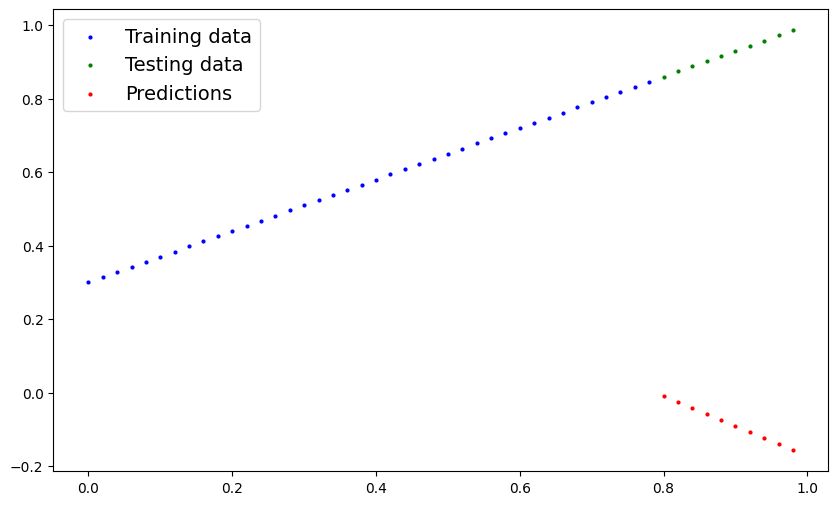

In [15]:
plot_predictions(predictions=y_preds);

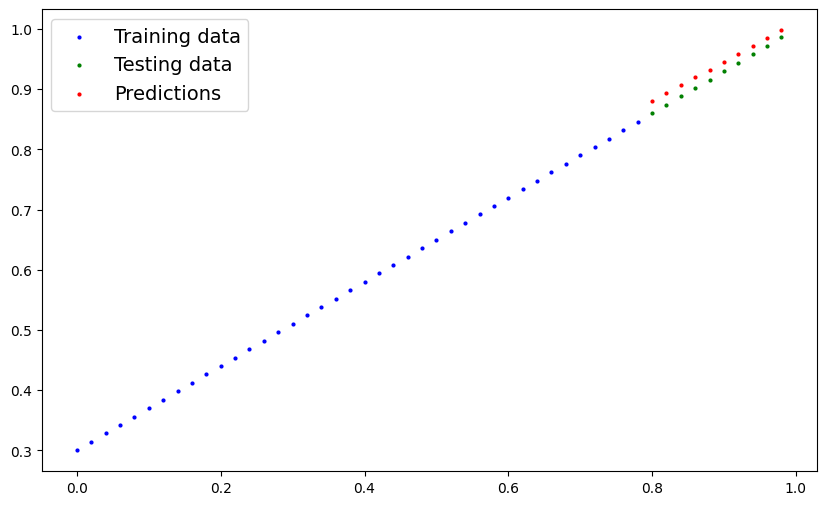

In [16]:
plot_predictions(predictions=y_preds_new);

In [17]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.3539389 , 0.25278917, 0.21740368, 0.18305185, 0.14875565,
        0.11436768, 0.08003256, 0.04571965, 0.03972138, 0.03972138,
        0.03972138, 0.03972138, 0.03972138, 0.03972138, 0.03972138,
        0.03972138, 0.03972138, 0.03972138, 0.03972138, 0.03972138],
       dtype=float32),
 [tensor(0.9373),
  tensor(0.6090),
  tensor(0.4988),
  tensor(0.4230),
  tensor(0.3403),
  tensor(0.2575),
  tensor(0.1817),
  tensor(0.0990),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185),
  tensor(0.1185)])

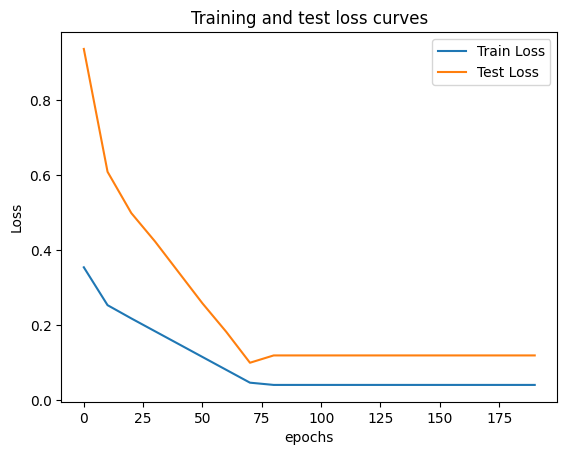

In [18]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend();

In [19]:
from pathlib import Path

path_of_model = Path("models")

path_of_model.mkdir(parents=True, exist_ok=True)

model_name = "01_pytorch.pth"
model_save_path = path_of_model / model_name

print(f"Saving model to: {model_save_path}")
torch.save(obj=m1.state_dict(),
           f = model_save_path)



Saving model to: models/01_pytorch.pth


In [20]:
!ls -1 models

01_pytorch.pth


In [21]:
load_m1 = linearregression()
load_m1.state_dict()

OrderedDict([('weights', tensor([0.4827])), ('bias', tensor([-0.1945]))])

In [22]:
load_m1.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [23]:
load_m1.state_dict()

OrderedDict([('weights', tensor([0.6530])), ('bias', tensor([0.3581]))])

In [24]:
load_m1.eval()
with torch.inference_mode():
    load_m1_preds = load_m1(X_test)
    
load_m1_preds

tensor([[0.8804],
        [0.8935],
        [0.9066],
        [0.9196],
        [0.9327],
        [0.9457],
        [0.9588],
        [0.9718],
        [0.9849],
        [0.9980]])

In [29]:
y_preds == load_m1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [30]:
m1.eval()
with torch.inference_mode():
    y_preds = m1(X_test)
    
y_preds

tensor([[0.8804],
        [0.8935],
        [0.9066],
        [0.9196],
        [0.9327],
        [0.9457],
        [0.9588],
        [0.9718],
        [0.9849],
        [0.9980]])

In [27]:
!nvidia-smi


Thu Jul 10 10:46:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.01              Driver Version: 576.88         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   50C    P8              3W /  115W |     561MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----